# Shapelets

In this example, we will use random shapelets to embed time series.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from wildboar.datasets import load_dataset
from wildboar.embed import RandomShapeletEmbedding
from wildboar.ensemble import ShapeletForestEmbedding

random_state = 1234

First, we load the dataset.

In [2]:
x, y = load_dataset("CBF")
labels, index = np.unique(y, return_inverse=True)

We define a function for plotting the 3d-projection.

In [3]:
def plot(p, var, labels, index):
    colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(p[:, 0], p[:, 1], p[:, 2], color=colors[index, :])
    ax.set_xlabel("Component 1 (%.2f variance explained)" % var[0])
    ax.set_ylabel("Component 2 (%.2f variance explained)" % var[1])
    ax.set_zlabel("Component 3 (%.2f variance explained)" % var[2])

## Random shapelet embedding
Next, we define the pipeline.

In [4]:
rse = make_pipeline(
    RandomShapeletEmbedding(
        n_shapelets=1000,
        metric="dtw",
        metric_params={"r": 0.5},
        random_state=random_state,
        n_jobs=-1,
    ),
    PCA(n_components=3, random_state=random_state),
)

And, plot the three components with the amount of explained variance.

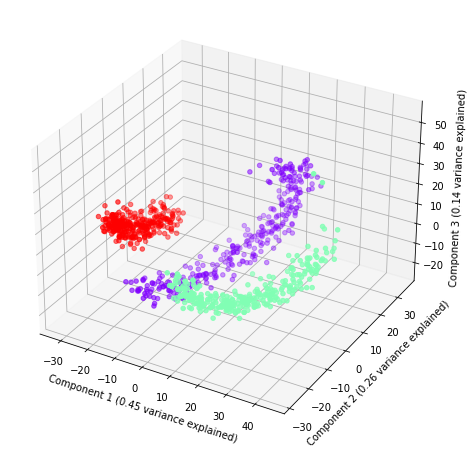

In [5]:
plot(rse.fit_transform(x), rse.steps[1][1].explained_variance_ratio_, labels, index)

## Shapelet forest embedding

Finally, we define a new pipeline with ``ShapeletForestEmbedding`` and, again, plot it.

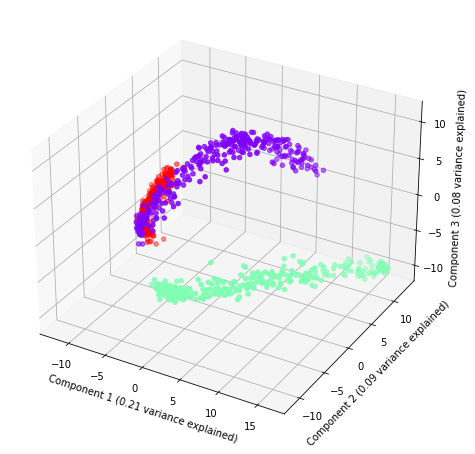

In [6]:
sfe = make_pipeline(
    ShapeletForestEmbedding(
        n_estimators=1000,
        metric="scaled_euclidean",
        random_state=random_state,
        n_jobs=-1,
        sparse_output=False,
    ),
    PCA(n_components=3, random_state=random_state),
)
plot(sfe.fit_transform(x), sfe.steps[1][1].explained_variance_ratio_, labels, index)